###  Classification Targets

Target - the target is an ordinal variable indicating groups of income levels.

1 = extreme poverty \
2 = moderate poverty \
3 = vulnerable households \
4 = non vulnerable households


https://www.kaggle.com/competitions/costa-rican-household-poverty-prediction/data

### Setup

In [1]:
%pip install -r ../requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


### Data Preparation

In [2]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
data_dir = '../data/'
test_csv = data_dir + 'test.csv'
train_csv = data_dir + 'train.csv'
prediction_column = "Target"

### Data Preparation

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


def onehot_encoding(data):
    data = data[:]
    encoder = OneHotEncoder()
    encoder.fit(data)
    return encoder.transform(data).toarray()

def preprocess(data):
    encoder = OneHotEncoder()
    data = data.dropna()
    return encoder.fit_transform(data).toarray()


def prepare(csv_path = None, data = None):
    if csv_path is None and data is None:
        raise ValueError("Either csv_path or data must be provided")
    if csv_path is not None and data is not None:
        raise ValueError("Only one of csv_path or data must be provided")
    raw_data = None
    if csv_path is not None:
        raw_data = pd.read_csv(csv_path)
    else:
        raw_data = data  
    return onehot_encoding(raw_data)

In [5]:
data = pd.read_csv(train_csv)
target = data[prediction_column]
data = data.drop(columns=[prediction_column])
data.describe(include = 'all')

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,9557,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000
unique,9557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_279628684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,...,34.303547,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302
std,NaN,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,...,21.612261,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050
min,NaN,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000
25%,NaN,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,17.000000,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000
50%,NaN,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,31.000000,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000
75%,NaN,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,...,51.000000,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000


In [6]:
pd.read_csv(train_csv).describe(include = 'all')

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9557,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
unique,9557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_279628684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,NaN,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,NaN,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,NaN,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,NaN,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,NaN,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000


In [57]:
data.shape

(9557, 142)

<Axes: >

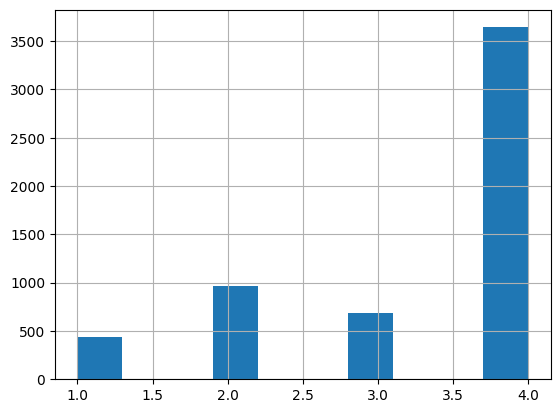

In [7]:

data = prepare(data=data)
# target = pd.read_csv(train_csv)[prediction_column]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=42)
y_train.hist()

### Submission

In [6]:
def export_submission(df):
    df.to_csv('submission.csv', index=False)

### Data Overview

### Sampling

In [8]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

def oversample(X, y):
    ros = RandomOverSampler(random_state=0)
    return ros.fit_resample(X, y)

def undersample(X, y):
    ros = RandomUnderSampler(random_state=0)
    return ros.fit_resample(X, y)

def smotsample(X, y):
    ros = SMOTETomek(sampling_strategy='auto')
    return ros.fit_resample(X, y)

<Axes: >

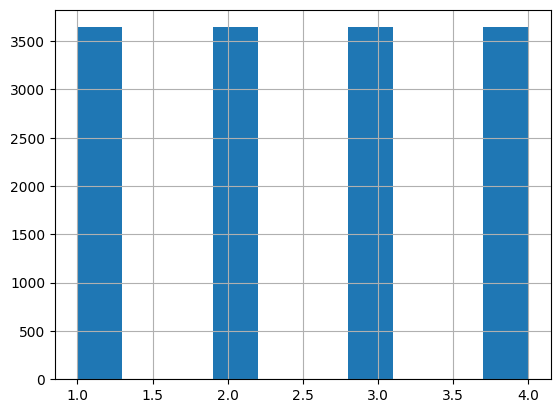

In [9]:
oversampled_X, oversampled_y = oversample(X_train, y_train)
oversampled_y.hist()

<Axes: >

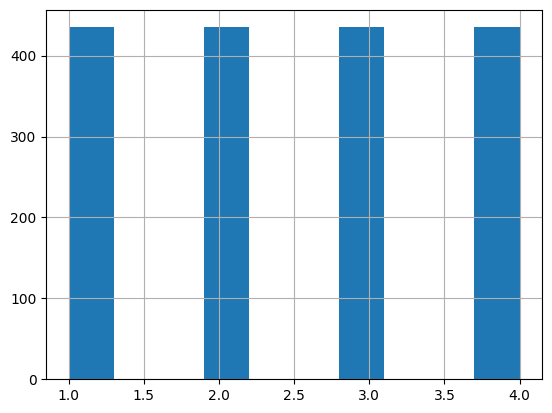

In [10]:
undersampled_X, undersampled_y = undersample(X_train, y_train)
undersampled_y.hist()

<Axes: >

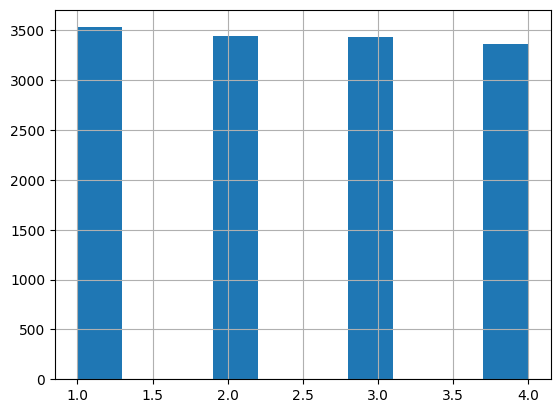

In [6]:
smotsampled_X, smotsampled_y = smotsample(X_train, y_train)
smotsampled_y.hist()

## Ensemble learning

### Shared Code

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

def train_model(model, train_x, train_y, test_size=0.4, param_grid = None):
    X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=test_size, random_state=42)

    if param_grid is not None:
        # model = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        # model = GridSearchCV(model, param_grid, cv=5, scoring='f1') # this works for binary classification
        # For multi-class classification = weighted, micro, macro
        model = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted')
        
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, model.predict(X_test))
    return model, accuracy

def important_features(trained_model):
    columns = train[:]
    columns = columns.drop(prediction_column, axis=1)
    columns = columns.columns
    if trained_model.__class__ == GridSearchCV:
        trained_model = trained_model.best_estimator_
        
    feature_importance = pd.DataFrame(trained_model.feature_importances_,
                                    index = columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
    return feature_importance

### AdaBoost

In [20]:
ada_boost_param_grid = {
    # run this when you have time
    # 'learning_rate': [0.01, 0.1, 0.5],
    # 'base_estimator__max_depth': [3, 5, 7],
    # 'base_estimator__min_samples_leaf': [5, 10, 20]

    'learning_rate': [0.01],
    'estimator__max_depth': [3],
    'estimator__min_samples_leaf': [5]
}

ada_boost_model, training_accuracy = train_model(AdaBoostClassifier(estimator=DecisionTreeClassifier()), undersampled_X, undersampled_y, param_grid=ada_boost_param_grid)
print(f"AdaBoost training accuracy: {training_accuracy}")


AdaBoost training accuracy: 0.4281609195402299


In [13]:
ada_boost_model

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'estimator__max_depth': [3],
                         'estimator__min_samples_leaf': [5],
                         'learning_rate': [0.01]},
             scoring='accuracy')

In [14]:
ada_boost_model.best_params_

{'estimator__max_depth': 3,
 'estimator__min_samples_leaf': 5,
 'learning_rate': 0.01}

In [ ]:
important_features(ada_boost_model)

### Gradient Boosting

In [16]:
gradient_boost_param_grid = {
    # Run this at before going to sleep
    # 'learning_rate': [0.01, 0.1, 0.5],
    # 'max_depth': [3, 5, 7],
    # 'min_samples_leaf': [5, 10, 20]

    'learning_rate': [0.1],
    'max_depth': [3],
    'min_samples_leaf': [5]
}

gradient_boost_model, training_accuracy = train_model(GradientBoostingClassifier(), undersampled_X, undersampled_y, param_grid=gradient_boost_param_grid)
print(f"GradientBoost training accuracy: {training_accuracy}")


GradientBoost training accuracy: 0.5330459770114943


In [52]:
gradient_boost_model.__class__

sklearn.model_selection._search.GridSearchCV

In [53]:
important_features(gradient_boost_model)

,importance
SQBdependency,0.112112
meaneduc,0.108947
SQBmeaned,0.094643
SQBhogar_nin,0.052052
qmobilephone,0.042270
...,...
instlevel2,0.000000
instlevel4,0.000000
instlevel9,0.000000
instlevel8,0.000000


### XGBoost

In [72]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def train_xgboost_model(train, xgb_params, test_size=0.2):
    train = train[:]
    X = train.drop(prediction_column, axis=1)
    y = train[prediction_column]
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    train_labels = le.fit_transform(y_train)
    val_labels = le.transform(y_test)

    dtrain = xgb.DMatrix(X_train, label=train_labels, enable_categorical=True)
    dval = xgb.DMatrix(X_test, label=val_labels, enable_categorical=True)
    eval_set = [(dtrain, 'train'), (dval, 'eval')]
    
    xgb_model = xgb.train(
        xgb_params, 
        dtrain, 
        num_boost_round=1000, 
        evals=eval_set, 
        early_stopping_rounds=10, 
        verbose_eval=False
    )
    accuracy = accuracy_score(val_labels, xgb_model.predict(dval))

    return xgb_model, accuracy

def xgb_feature_importance(xgb_model):
    feature_importance = xgb_model.get_score(importance_type='weight')
    feature_importance_df = pd.DataFrame({
        'Feature': list(feature_importance.keys()),
        'Importance': list(feature_importance.values())
    })
    feature_importance_df.sort_values(by='Importance', ascending=False).head(5)
    return feature_importance_df

In [73]:
xgb_params = {
    "objective": "multi:softmax", 
    "num_class": 4,
    "eval_metric": "merror"
}

xgb_model, training_accuracy = train_xgboost_model(train, xgb_params)
print(f"XGBoost training accuracy: {training_accuracy}")

XGBoost training accuracy: 0.9257322175732218


In [74]:
feature_importance_df = xgb_feature_importance(xgb_model)
feature_importance_df

,Feature,Importance
0,v2a1,750.0
1,hacdor,33.0
2,rooms,838.0
3,hacapo,14.0
4,v14a,12.0
...,...,...
117,area1,290.0
118,age,1131.0
119,SQBedjefe,1046.0
120,SQBdependency,799.0


In [ ]:
def hetrogeneous_ensemble_with_cnn(ada_boost_model, gradient_boost_model, xgb_model, train_x, train_y):
    X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.4, random_state=42)
    # TODO: combination of ensemble models with CNN
   
    

## Tasks
- ✅ A working setup for Ensemble learning with AdaBoost, Gradient Boosting and XGBoost
- ✅ Feature importance for the different models
- ✅ Compare the different models accuracy
- ✅ Add different data preprocessing methods
- ✅ Balance dataset by undersampling, and possibly oversampling
- ❌ Find optimum parameter for the different models
- ❌ Performance Metric
- ❌ Heterogeneous ensemble with simple CNN